### Set up spack and tesseract

`tesseract /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_CNN_EDM_4blocks_noattn/samples/samples_epoch_050000.png output`

In [2]:
!~/start_spack.sh

In [1]:
!spack

/bin/bash: spack: command not found


In [3]:
!source /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/software/spack/share/spack/setup-env.sh

In [1]:
!spack load tesseract

/bin/bash: spack: command not found


In [4]:
!spack load tesseract
!tesseract --list-langs

/bin/bash: spack: command not found


/bin/bash: tesseract: command not found


In [1]:
!tesseract /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_CNN_EDM_4blocks_noattn/samples/samples_epoch_050000.png output

/bin/bash: tesseract: command not found


In [3]:
!spack load tesseract

In [4]:
!tesseract --list-langs

List of available languages in "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/software/spack/opt/spack/linux-icelake/tesseract-5.5.0-bylla5ewu4d2sgfyfk4uibxxjtexjkl7/share/tessdata/" (1):
eng


### Try to PytesseractOCR the generated text

In [1]:
import os
from PIL import Image
import pytesseract

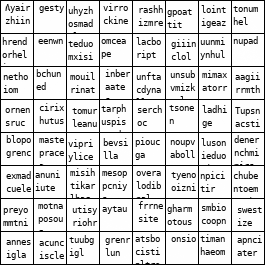

Myair|
Zhiin

gesty|

Juhyzh
osnad

chine

rashh|

lopost

Loint
igea:

el

hrend
orhel

oo

e

=
rive

siiin
st

mbal

=]

necho

=
et

ol

e

wnfa
i

ik
wmizk

ssgii
rouch

hutus

Leany

[eoh
juspis

e

Taahi
-

Tupsn

Slons
grenc

prace

Jiprs
tice

[
s

piouc
s

noupy
Sboll

Luson
iedo

Gerar
nchni

e
cusle

e
tikar

=
peniy

Todib

yend]

=

e

prere

posou

iz
i

o

Forne

ararn

ot
cooon

igla

Secle]

cuubg
it

arenr]
n

=

rseon

et




In [2]:
# If Tesseract isn't in your PATH, specify the full path:
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
imgdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_CNN_EDM_4blocks_noattn/samples"
imgpath = os.path.join(imgdir, "samples_epoch_050000.png")
# Load an image
img = Image.open(imgpath)
display(img)
# Perform OCR
text = pytesseract.image_to_string(img)
print(text)

ol
chiin



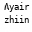

gesty



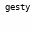

uhyzh
osmad



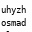

chine



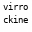

rashh



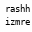

gpost.



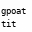

loint
igesz



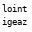

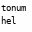

hrend
orhel



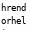

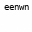

teduo



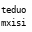

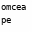

lacbo
rigt



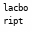

giiin
ol



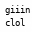

il



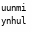

ot



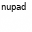

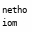

behun



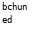

mouil



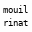

Ainber



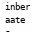

unfta
cdyna



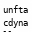

unsub
mizk



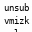

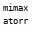

agi
rrmth



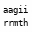

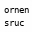

hutus



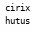

by



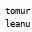

=
spis



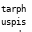

serch



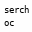

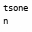

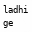

Tupsn



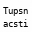

B
grenc



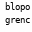

prace



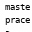

vipri.
ylice



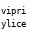

bevsi.
a



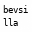

piouc.



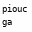

noupy.
ol



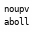

luson.
ieduo.



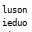

dener
nchni



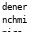

emad
o



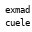

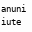

misih
tikar



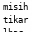

mesop
peniy



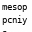

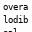

‘tyeno



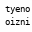

mpici



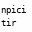

chube



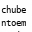

preyo



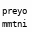

posou



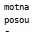

utisy
i



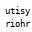

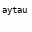

frrne



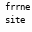

gharm



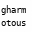

smbio
coopn



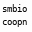

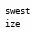

P



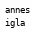

b



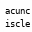

‘tuubg
gl



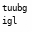

grenr
tun



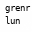

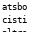

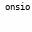

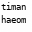

apnci



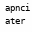

In [ ]:
imgdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_CNN_EDM_4blocks_noattn/samples"
step = 50000
imgpath = os.path.join(imgdir, f"samples_epoch_{step:06d}.png")
patches = get_montage_patches_pil(imgpath, patch_size=32, pad=1)
for patch in patches:
    print(pytesseract.image_to_string(patch))
    display(patch)

In [ ]:
import os
import glob
import re
from tqdm.auto import tqdm

imgdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_CNN_EDM_4blocks_noattn/samples"

# Find all sample files in the directory
sample_files = glob.glob(os.path.join(imgdir, "samples_epoch_*.png"))
steps = [int(re.search(r'samples_epoch_(\d+)\.png', os.path.basename(f)).group(1)) for f in sample_files]
steps.sort()

# Dictionary to store results: step -> list of recognized texts
ocr_results = {}

for step in tqdm(steps): # 1hr + for 500 * 64 samples 
    imgpath = os.path.join(imgdir, f"samples_epoch_{step:06d}.png")
    patches = get_montage_patches_pil(imgpath, patch_size=32, pad=1)
    
    # Extract text from each patch
    texts = []
    for patch in patches:
        text = pytesseract.image_to_string(patch).strip()
        texts.append(text)
    
    # Store in dictionary
    ocr_results[step] = texts
    
    # Print a sample to see progress
    print(f"Step {step}: Found {len(texts)} text samples")
    print(f"Sample texts: {texts[:3]}")

  0%|          | 0/494 [00:00<?, ?it/s]

Step 1: Found 64 text samples
Sample texts: ['', '', '']
Step 2: Found 64 text samples
Sample texts: ['', '', '']
Step 3: Found 64 text samples
Sample texts: ['', '', '']
Step 4: Found 64 text samples
Sample texts: ['', '', '']
Step 5: Found 64 text samples
Sample texts: ['', '', '']
Step 6: Found 64 text samples
Sample texts: ['', '', '']
Step 7: Found 64 text samples
Sample texts: ['', '', '']
Step 8: Found 64 text samples
Sample texts: ['', '', '']
Step 9: Found 64 text samples
Sample texts: ['', '', '']
Step 10: Found 64 text samples
Sample texts: ['', '', '']
Step 12: Found 64 text samples
Sample texts: ['', '', '']
Step 14: Found 64 text samples
Sample texts: ['', '', '']
Step 16: Found 64 text samples
Sample texts: ['', '', '']
Step 18: Found 64 text samples
Sample texts: ['', '', '']
Step 20: Found 64 text samples
Sample texts: ['', '', '']
Step 22: Found 64 text samples
Sample texts: ['', '', '']
Step 24: Found 64 text samples
Sample texts: ['', '', '']
Step 26: Found 64 text 

KeyboardInterrupt: 

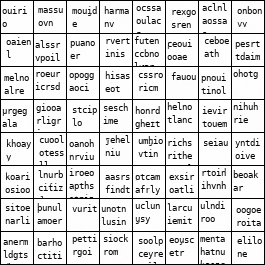

In [9]:
img

In [3]:
from PIL import Image

def get_montage_patches_pil(
    img, 
    patch_size=32, 
    pad=4, 
    margin=None
):
    """
    Args:
      img:         PIL.Image or path to image
      patch_size:  size of each square tile
      pad:         pixels between tiles
      margin:      pixels of padding around the full montage;
                   if None, assumed equal to `pad`
    Returns:
      List[PIL.Image] of exactly patch_size×patch_size tiles.
    """
    if isinstance(img, str):
        img = Image.open(img)
    W, H = img.size
    if margin is None:
        margin = pad

    # how many columns/rows of tiles?
    n_cols = (W - 2*margin + pad) // (patch_size + pad)
    n_rows = (H - 2*margin + pad) // (patch_size + pad)

    patches = []
    for i in range(n_rows):
        for j in range(n_cols):
            x = margin + j*(patch_size + pad)
            y = margin + i*(patch_size + pad)
            box = (x, y, x + patch_size, y + patch_size)
            patches.append(img.crop(box))
    return patches

# Example:
# patches = get_montage_patches_pil("montage.png", patch_size=32, pad=4)
# print(len(patches), patches[0].size)  # -> (32, 32)

In [3]:
import os
from PIL import Image
import pytesseract

# If Tesseract isn't in your PATH, specify the full path:
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
imgdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_CNN_EDM_4blocks_noattn/samples"
imgpath = os.path.join(imgdir, "samples_epoch_010000.png")

In [ ]:
patches = get_montage_patches_pil(imgpath, patch_size=32, pad=1)
for patch in patches:
    print(pytesseract.image_to_string(patch))



uid

harma

aulac

rexgo

aclal

‘onbon


alssr
watl

puanc.


futen
cebro


Feoui

ceboe
“h

pesrt
ey

melno
=

iersd


hisas


fauou

proui
i

-

broeg
g

giooa
rligr

steip

sesch

honrd
ghait

helno.
anc


nihuh

Khoay

cuool

oanch

| i

i

richs
rithe


yntdi

koari

Tnurb
citiz


e

oo

ol

rtoid
hurh

beoak.

nerl

bunil


e

uclun
vy

larcu

ulndi


ldgts

barho

ot

siock

oolp
ceyre

eoysc

hatnu

elilo



In [8]:
import pytesseract
from pytesseract import Output
from PIL import Image

# your patch comes in as a PIL Image already
patch = patch.convert('L')                       # grayscale
patch = patch.resize((patch.width*2, patch.height*2), Image.BICUBIC)

# build a config string
cfg = r'''
  --oem 1                # LSTM only (best accuracy)
  --psm 7                # treat the image as a single text line
  -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789
  -c load_system_dawg=0  # disable the word list
  -c load_freq_dawg=0    # disable the frequent word list
  -c wordlist_file=      # make sure no user wordlist is loaded
'''.replace("\n", " ")

# run Tesseract
data = pytesseract.image_to_data(
    patch,
    config=cfg,
    output_type=Output.DICT
)

# collect the raw text
raw = "".join(data['text']).strip()
print(raw, data['conf'])

apnciater [-1, -1, -1, -1, 71, -1, 94]


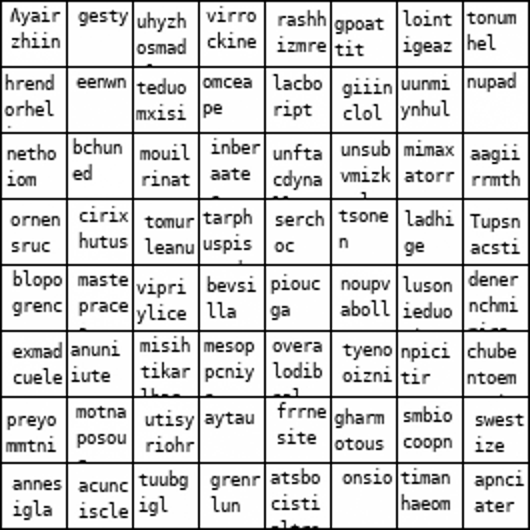

In [7]:
import pytesseract
from PIL import Image, ImageDraw

imgdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_CNN_EDM_4blocks_noattn/samples"
imgpath = os.path.join(imgdir, "samples_epoch_050000.png")
# 1) load & preprocess
img = Image.open(imgpath).convert('L')            # grayscale
img = img.resize((img.width*2, img.height*2), Image.BICUBIC)  
# (Tesseract likes ~300 DPI)

# 2) config: LSTM engine only, single‐char mode
cfg = r'--oem 1 --psm 10 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'

# 3) get raw boxes
boxes = pytesseract.image_to_boxes(img, config=cfg)

draw = ImageDraw.Draw(img)
for line in boxes.splitlines():
    ch, x0, y0, x1, y1, _ = line.split()
    x0, y0, x1, y1 = map(int, (x0, y0, x1, y1))
    # Tesseract’s coords are bottom‑origin
    h = img.height
    draw.rectangle([x0, h-y1, x1, h-y0], outline='red')
    draw.text((x0, h-y1-10), ch, fill='red')

img

### Tesseeract Configured version

RAW TEXT:
 Myair
zhiin

Line 02: zhiin


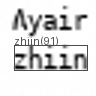

RAW TEXT:
 gesty

Line 01: gesty


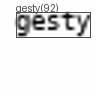

RAW TEXT:
 uhyzh
osmad

Line 01: uhyzh
Line 02: osmad


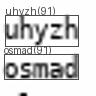

RAW TEXT:
 virro
ckine

Line 01: virro
Line 02: ckine


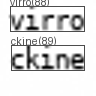

RAW TEXT:
 rashh
izmre

Line 01: rashh
Line 02: izmre


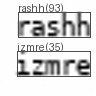

RAW TEXT:
 gpoat
tit

Line 01: gpoat
Line 02: tit


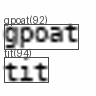

RAW TEXT:
 loint
igeaz

Line 01: loint
Line 02: igeaz


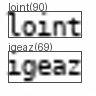

RAW TEXT:
 tonum
hel

Line 01: tonum
Line 02: hel


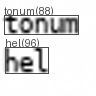

RAW TEXT:
 hrend
orhel

Line 01: hrend
Line 02: orhel


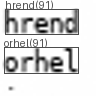

RAW TEXT:
 eenwn

Line 01: eenwn


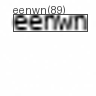

RAW TEXT:
 teduo
mXisi

Line 01: teduo


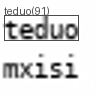

RAW TEXT:
 omcea
pe

Line 01: omcea
Line 02: pe


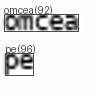

RAW TEXT:
 lacbo
ript

Line 01: lacbo
Line 02: ript


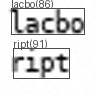

RAW TEXT:
 giiin
clol

Line 01: giiin
Line 02: clol


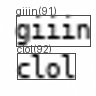

RAW TEXT:
 uunmi
ynhul

Line 01: uunmi
Line 02: ynhul


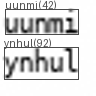

RAW TEXT:
 nupad

Line 01: nupad


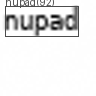

RAW TEXT:
 netho
iom

Line 01: netho
Line 02: iom


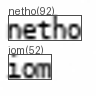

RAW TEXT:
 bchun
ed

Line 01: bchun
Line 02: ed


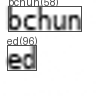

RAW TEXT:
 mouil
rinat

Line 01: mouil
Line 02: rinat


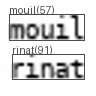

RAW TEXT:
 inber
aate

Line 02: aate


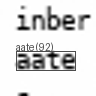

RAW TEXT:
 unfta
cdyna

Line 01: unfta
Line 02: cdyna


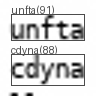

RAW TEXT:
 unsub
wmizk
o

Line 01: unsub
Line 02: wmizk


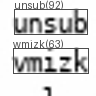

RAW TEXT:
 mimax
atorr

Line 01: mimax
Line 02: atorr


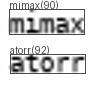

RAW TEXT:
 aagll
rrmth

Line 02: rrmth


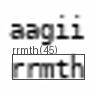

RAW TEXT:
 ornen
sruc

Line 01: ornen
Line 02: sruc


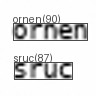

RAW TEXT:
 cirix
hutus

Line 01: cirix
Line 02: hutus


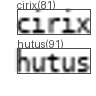

RAW TEXT:
 tomur
leanu

Line 01: tomur
Line 02: leanu


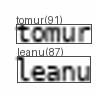

RAW TEXT:
 tarph
uspis

Line 01: tarph
Line 02: uspis


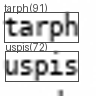

RAW TEXT:
 serch
oc

Line 01: serch
Line 02: oc


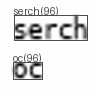

RAW TEXT:
 tsone
n

Line 01: tsone
Line 02: n


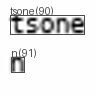

RAW TEXT:
 ladhi
ge

Line 01: ladhi
Line 02: ge


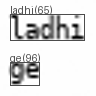

RAW TEXT:
 Tupsn
acsti

Line 01: Tupsn
Line 02: acsti


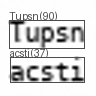

RAW TEXT:
 blopo
grenc

Line 01: blopo
Line 02: grenc


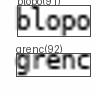

RAW TEXT:
 maste
prace

Line 01: maste
Line 02: prace


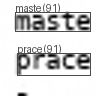

RAW TEXT:
 vipri
ylice

Line 01: vipri
Line 02: ylice


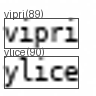

RAW TEXT:
 bevsi
la

Line 01: bevsi
Line 02: la


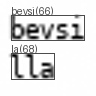

RAW TEXT:
 pilouc
ga

Line 01: pilouc
Line 02: ga


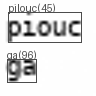

RAW TEXT:
 noupv
aboll

Line 01: noupv
Line 02: aboll


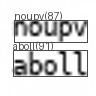

RAW TEXT:
 luson
ieduo

Line 01: luson


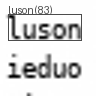

RAW TEXT:
 dener
nchmi

Line 01: dener
Line 02: nchmi


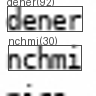

RAW TEXT:
 exmad
cuele

Line 01: exmad
Line 02: cuele


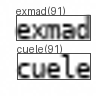

RAW TEXT:
 anuni
iute

Line 01: anuni
Line 02: iute


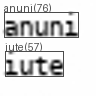

RAW TEXT:
 misih
tikar
omd

Line 01: misih
Line 02: tikar


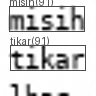

RAW TEXT:
 mesop
peniy

Line 01: mesop
Line 02: peniy


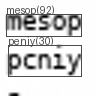

RAW TEXT:
 overa
lodib

Line 01: overa
Line 02: lodib


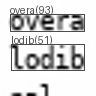

RAW TEXT:
 tyeno
oizni

Line 01: tyeno
Line 02: oizni


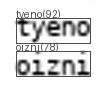

RAW TEXT:
 npici
tir

Line 01: npici
Line 02: tir


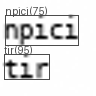

RAW TEXT:
 chube
ntoem

Line 01: chube
Line 02: ntoem


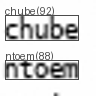

RAW TEXT:
 preyo
mmtnl

Line 01: preyo


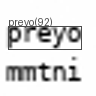

RAW TEXT:
 motna
posou

Line 01: motna
Line 02: posou


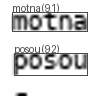

RAW TEXT:
 utisy
riohr

Line 01: utisy
Line 02: riohr


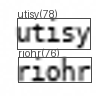

RAW TEXT:
 aytau

Line 01: aytau


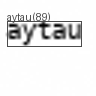

RAW TEXT:
 frrne
site

Line 01: frrne
Line 02: site


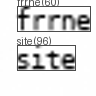

RAW TEXT:
 gharm
otous

Line 01: gharm
Line 02: otous


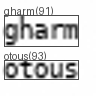

RAW TEXT:
 smbio
coopn

Line 01: smbio
Line 02: coopn


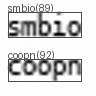

RAW TEXT:
 swest
ize

Line 01: swest
Line 02: ize


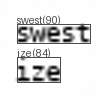

RAW TEXT:
 annes
igla

Line 01: annes
Line 02: igla


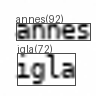

RAW TEXT:
 acunc
iscle

Line 01: acunc
Line 02: iscle


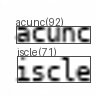

RAW TEXT:
 tuubg
igl

Line 01: tuubg
Line 02: igl


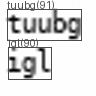

RAW TEXT:
 grenr
lun

Line 01: grenr
Line 02: lun


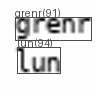

RAW TEXT:
 atsbo
cisti
PER

Line 01: atsbo
Line 02: cisti


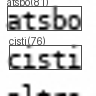

RAW TEXT:
 onsio

Line 01: onsio


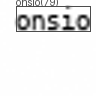

RAW TEXT:
 timan
haeom

Line 01: timan
Line 02: haeom


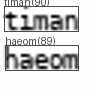

RAW TEXT:
 apnci
ater

Line 01: apnci
Line 02: ater


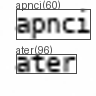

In [12]:
import pytesseract
from pytesseract import Output
from PIL import Image, ImageDraw

# common pre‐processing
def prep(img):
    img = img.convert('L')                                    # gray
    img = img.resize((img.width*3, img.height*3), Image.BICUBIC)  
    return img

# config: LSTM only, block of text, no dictionaries, whitelist
BASE_CONFIG = (
    '--oem 1 '
    '--psm 6 '                       # assume a uniform block of text
    '-c tessedit_char_whitelist='
      'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
      'abcdefghijklmnopqrstuvwxyz'
    #   '0123456789 '
    ' '
    '-c load_system_dawg=0 '
    '-c load_freq_dawg=0 '
    '-c wordlist_file='
)

for patch in patches:
    img = prep(patch)
    
    # 1) full‐text dump (keeps line breaks)
    txt = pytesseract.image_to_string(img, config=BASE_CONFIG)
    print("RAW TEXT:\n", txt)
    
    # 2) structured data if you want bounding boxes + confidences
    data = pytesseract.image_to_data(
        img,
        config=BASE_CONFIG,
        output_type=Output.DICT
    )
    
    # reconstruct lines
    lines = {}
    n = len(data['text'])
    for i in range(n):
        word = data['text'][i].strip()
        if not word: 
            continue
        ln = data['line_num'][i]
        conf = int(data['conf'][i])
        # filter out very low confidence
        if conf < 30:
            continue
        lines.setdefault(ln, []).append((word, conf,
                                         (data['left'][i],
                                          data['top'][i],
                                          data['width'][i],
                                          data['height'][i])))
    
    # print per‐line
    for ln in sorted(lines):
        words = [w for w,_,_ in lines[ln]]
        print(f"Line {ln:02d}: {' '.join(words)}")
    
    # (optional) draw boxes
    draw = ImageDraw.Draw(img)
    for ln in lines:
        for w, conf, (x,y,wid,ht) in lines[ln]:
            draw.rectangle([x, y, x+wid, y+ht], outline='red', width=1)
            draw.text((x, y-10), f"{w}({conf})", fill='red')
    display(img)

### Easy OCR

In [11]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [12]:
imgdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_CNN_EDM_4blocks_noattn/samples"
step = 50000
imgpath = os.path.join(imgdir, f"samples_epoch_{step:06d}.png")
result = reader.readtext(imgpath)

In [15]:
result

[([[4, 4], [30, 4], [30, 12], [4, 12]], 'Wyalc', 0.13807476439524521),
 ([[67, 5], [97, 5], [97, 19], [67, 19]], 'uhyzh', 0.9995313211107076),
 ([[102, 4], [128, 4], [128, 12], [102, 12]], 'Viccc', 0.31111829820358294),
 ([[139, 5], [187, 5], [187, 17], [139, 17]], 'rashhgpoz', 0.8150238892470474),
 ([[200, 6], [226, 6], [226, 14], [200, 14]], 'Loint', 0.45326497665744714),
 ([[232, 6], [258, 6], [258, 12], [232, 12]], 'Todim', 0.04299476265686236),
 ([[3, 15], [33, 15], [33, 27], [3, 27]], 'zhiin', 0.6317530295086153),
 ([[67, 17], [93, 17], [93, 29], [67, 29]], 'osmao', 0.11599070822780763),
 ([[103, 15], [131, 15], [131, 27], [103, 27]], 'ckine', 0.9877720298430881),
 ([[138, 18], [162, 18], [162, 26], [138, 26]], '1amre', 0.13301625534968323),
 ([[199, 17], [227, 17], [227, 29], [199, 29]], 'igeaz', 0.9864861518863642),
 ([[2, 38], [26, 38], [26, 46], [2, 46]], 'nrenc', 0.8561690341124969),
 ([[38, 38], [64, 38], [64, 44], [38, 44]], 'eerwr', 0.028354893000114824),
 ([[68, 40], [94

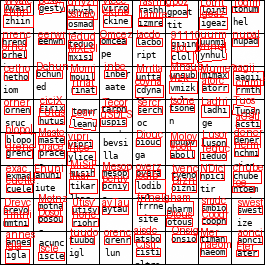

In [16]:
from PIL import Image, ImageDraw, ImageFont

# Open the image
img = Image.open(imgpath)

# Create a copy to draw on
img_with_boxes = img.copy()
draw = ImageDraw.Draw(img_with_boxes)

# Draw bounding boxes and text for each detection
for detection in result:
    # Extract bounding box coordinates, text, and confidence
    box, text, confidence = detection
    
    # Draw rectangle
    # draw.rectangle(box, outline="red", width=2)
    pts = [(x, y) for x, y in box]
    draw.polygon(pts, outline="red")
    
    # Add text above the box
    draw.text((box[0][0], box[0][1] - 10), f"{text}", fill="red") # ({confidence:.2f})

# Display the annotated image
img_with_boxes

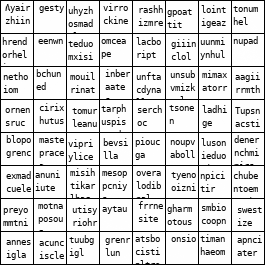

In [6]:
img = Image.open(imgpath)
img

In [5]:
result

[([[4, 4], [30, 4], [30, 12], [4, 12]], "I'a1[", 0.09513604246930357),
 ([[67, 5], [97, 5], [97, 19], [67, 19]], 'uhyzh', 0.545700492662255),
 ([[102, 4], [128, 4], [128, 12], [102, 12]], 'UITTC', 0.14169953602052826),
 ([[139, 5], [187, 5], [187, 17], [139, 17]],
  'Tashhl?pos',
  0.19077146523379238),
 ([[200, 6], [226, 6], [226, 14], [200, 14]], 'LOITt', 0.16185005980091288),
 ([[232, 6], [258, 6], [258, 12], [232, 12]], 'TTTIIT', 0.25287051214251205),
 ([[3, 15], [33, 15], [33, 27], [3, 27]], 'hzzn', 0.35965144634246826),
 ([[67, 17], [93, 17], [93, 29], [67, 29]], 'OSTaT', 0.15242765205678566),
 ([[103, 15], [131, 15], [131, 27], [103, 27]], 'Cline', 0.2121892543929059),
 ([[138, 18], [162, 18], [162, 26], [138, 26]], 'Te', 0.24674310131114494),
 ([[199, 17], [227, 17], [227, 29], [199, 29]], 'igea', 0.5193787074062821),
 ([[2, 38], [26, 38], [26, 46], [2, 46]], 'hTENC', 0.09506493473247407),
 ([[38, 38], [64, 38], [64, 44], [38, 44]], 'SSTUIT', 0.015409889755574063),
 ([[68, 40],

In [ ]:
imgdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/words32x32_50k_UNet_CNN_EDM_4blocks_noattn/samples"
step = 1
imgpath = os.path.join(imgdir, f"samples_epoch_{step:06d}.png")
patches = get_montage_patches_pil(imgpath, patch_size=32, pad=1)
for patch in patches:
    print(pytesseract.image_to_string(patch))